#  Monte Carlo Simulation of Stock Portfolio Returns

### What is a Monte Carlo Simulation
Computational simulations that rely on repeated random sampling to obtain results.

### Why use the Monte Carlo Simulation
Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.


<br>

## Python Guide To Monte Carlo Simulation



### Step One - Import Dependencies into Python (theses are third party libaries that we can download and install)

`pandas` - Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

`numpy` - NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. Used commonaly for creating and manipulating complex multidimensional arrays.

`matplotlib.pyplot` - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

`datatime` - Datetime module supplies classes for manipulating dates and times.

`pandas_datareader` - Used to get Yahoo specific data set.

In [2]:
pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-4q97cxjk
  Running command git clone -q https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-4q97cxjk
  Resolved https://github.com/pydata/pandas-datareader.git to commit fdade48126cf588d10c1b207668cf11b314b1861
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas_datareader import data as pdr

## Step Two - Create function to get stock data from online

The `get_stocks_data` function takes three parameters used to fetch online stocks, these parameters are set when calling the function later on in the notebook.

Function returns [Mean of returns & Covariance matrix of returns]

In [4]:
def get_stocks_data(stocks, start, end):
#     Get Yahoo Stock Data
    stockData = pdr.get_data_yahoo(stocks, start, end)
#     Exact only the Close column from stock data
    closeData = stockData['Close']
#     Using pandas .pct_change function to get the days change percentage
    returns = closeData.pct_change()
#     compute means return and covariance matrix
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

### Step Three - Call our get_stock_data function

We next call our `get_stocks_data()` passing in the stocks with wish to return using an array

In [5]:
stocksList = ['CBA.AX', 'BHP.AX', 'TLS.AX', 'NAB.AX', 'WBC.AX', 'STO.AX']
endData = datetime.now()
startData = endData - timedelta(days=300)

meanReturns, covMatrix = get_stocks_data(stocksList, startData, endData)

In [6]:
print(meanReturns)

Symbols
CBA.AX    0.001214
BHP.AX   -0.000464
TLS.AX    0.001332
NAB.AX    0.001231
WBC.AX    0.001403
STO.AX    0.000760
dtype: float64


In [7]:
print(covMatrix)

Symbols    CBA.AX    BHP.AX    TLS.AX    NAB.AX    WBC.AX    STO.AX
Symbols                                                            
CBA.AX   0.000152  0.000062  0.000031  0.000078  0.000074  0.000087
BHP.AX   0.000062  0.000359  0.000042  0.000050  0.000059  0.000166
TLS.AX   0.000031  0.000042  0.000124  0.000039  0.000038  0.000037
NAB.AX   0.000078  0.000050  0.000039  0.000103  0.000086  0.000076
WBC.AX   0.000074  0.000059  0.000038  0.000086  0.000121  0.000080
STO.AX   0.000087  0.000166  0.000037  0.000076  0.000080  0.000396


Step 4 - Create our Matrix arrays and weights

In [8]:
# Numpy.random create number between 0-1 np.random.random(len(meanReturns)) creates random number between the previously generated random number and the length of the meanReturns data set
weights = np.random.random(len(meanReturns))
print(weights)

[0.75126211 0.49609401 0.30957003 0.47586701 0.35907564 0.3150903 ]


In [9]:
# Noramlise by sum of all of the weights (ensures weight matrix = 1)
weights /= np.sum(weights)
print(weights)

[0.27752991 0.18326617 0.11436081 0.17579394 0.13264908 0.11640009]


### Step 5 - Create Monte Carlo Configuration

In [10]:
N = 100 # Nth Number of Simulations
T = 100 # Time Range in Day

meanMatrix = np.full(shape=(T, len(weights)), fill_value=meanReturns) # Create an Array matrix shape of [col: number of days, rows: amount of stocks] and fill its with our meanReturns values
meanMatrix = meanMatrix.T # Transpose Matrix, transposes matix shapes

portfolioSimsMatrix = np.full(shape=(T, N), fill_value=0.00) # Create an empty Array matrix for the number of sims x days and fills matrix with 0.00
initialPortfolio = 10000 # Starting $ value

In [11]:
print(meanMatrix)

[[ 0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367  0.00121367  0.00121367  0.00121367
   0.00121367  0.00121367  0.00121367 

In [12]:
print(portfolioSimsMatrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Step 6 - Perform Monte Carlo Simulation

We will be assuming daily returns are distributed by a multivaritate normal distributions

`Rt~MVN(μ,∑)`

Cholesky Decomposition is used to determine Lower Traingular Matrix

`FORMULA WAS TO HARD TO WRITE`

Zt are the samples from a normal distribution (I represent the indentity matrix)

In [15]:
# Simulation loop (will run Nth number of time)
for m in range(0, N):
    Z = np.random.normal(size=(T, len(weights))) #Create a random matrix for day * amount of stock using normal distrubtion
    L = np.linalg.cholesky(covMatrix) # will work out the lower traingular for cholesky decomposition
    dailyReturns = meanMatrix + np.inner(L, Z) # meanMatrix + dot product of stocks
    portfolioSimsMatrix[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio # push the reuslts to our portfolio sims matrix
    

In [ ]:
### Step 7 - Plot Portfolio Simulations

Using `Matlabs` we can now plot our portofilio simulations onto a graph

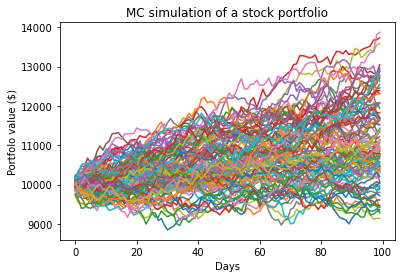

In [19]:
plt.plot(portfolioSimsMatrix)
plt.ylabel("Portfolo value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")
plt.show()

# Final Code

Text(0.5, 1.0, 'MC simulation of a stock portfolio')

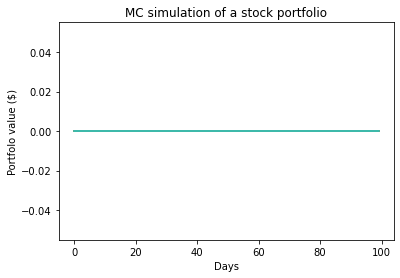

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas_datareader import data as pdr

def get_stocks_data(stocks, start, end):
#     Get Yahoo Stock Data
    stockData = pdr.get_data_yahoo(stocks, start, end)
#     Exact only the Close column from stock data
    closeData = stockData['Close']
#     Using pandas .pct_change function to get the days change percentage
    returns = closeData.pct_change()
#     compute means return and covariance matrix
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stocksList = ['CBA.AX', 'BHP.AX', 'TLS.AX', 'NAB.AX', 'WBC.AX', 'STO.AX']
endData = datetime.now()
startData = endData - timedelta(days=300)

meanReturns, covMatrix = get_stocks_data(stocksList, startData, endData)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

N = 100 # Nth Number of Simulations
T = 100 # Time Range in Day

meanMatrix = np.full(shape=(T, len(weights)), fill_value=meanReturns) # Create an Array matrix shape of [col: number of days, rows: amount of stocks] and fill its with our meanReturns values
meanMatrix = meanMatrix.T # Transpose Matrix, transposes matix shapes

portfolioSimsMatrix = np.full(shape=(T, N), fill_value=0.00) # Create an empty Array matrix for the number of sims x days and fills matrix with 0.00
initialPortfolio = 10000 # Starting $ value

plt.plot(portfolioSimsMatrix)
plt.ylabel("Portfolo value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")